<a href="https://colab.research.google.com/github/Nur9702/Postgresql/blob/main/SimpleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [3]:
df['district'].value_counts()

,count
district,
Чиланзарский,1616
Мирзо-Улугбекский,1342
Учтепинский,872
Юнусабадский,847
Мирабадский,717
Яккасарайский,628
Яшнободский,456
Шайхантахурский,356
Олмазорский,262


In [4]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
x = housing['size']
x

,size
2,42.0
3,65.0
4,70.0
5,28.0
6,30.0
...,...
7404,70.0
7422,20.0
7433,32.0
7445,70.0


In [6]:
y = housing['price']
y

,price
2,37000.0
3,49500.0
4,55000.0
5,25500.0
6,21200.0
...,...
7404,48000.0
7422,18500.0
7433,28000.0
7445,49800.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

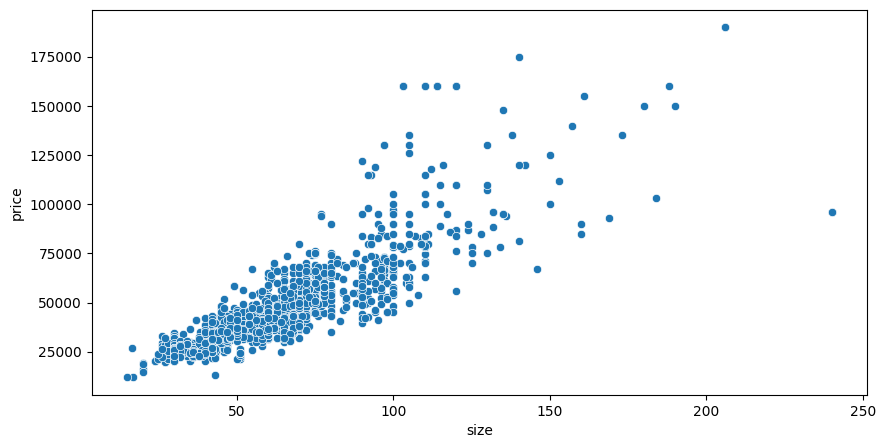

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

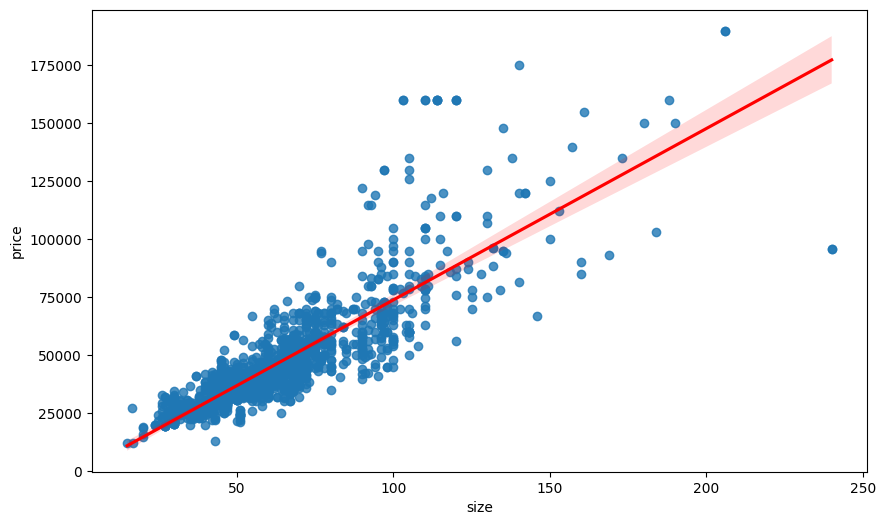

In [9]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()


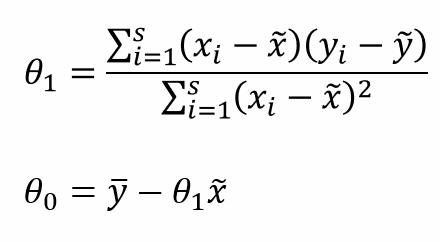

In [10]:
import numpy as np
x_mean = np.mean(x)
y_mean = np.mean(y)
n = len(x)

In [11]:
numerator1 = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
print(f"{numerator1=}")

numerator1=740.0264822713287


In [12]:
denominator0 = y_mean - numerator1*x_mean
print(f"{denominator0=}")

denominator0=-195.94911352690542


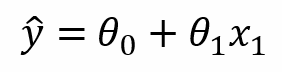

In [13]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")


x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [14]:
y_predict = denominator0+numerator1*x_test
print(f"{y_predict=}")

y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


In [15]:
mae = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{mae=}")

mae=4140.35031634715


In [16]:
rmse = np.sqrt(np.sum((y_predict - y_test)**2)/len(y_test))
print(f"{rmse=}")

rmse=5882.051673173715


In [17]:
housing.shape

(1616, 6)

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

#Liner Regression Model

In [40]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']].to_numpy())

# Modelni tarbiyalaymiz
lr_model.fit(x_train, y_train)

#denominator(01) va  numerator(0) kaifsentlarini
numerator1 = lr_model.coef_[0]
denominator0 = lr_model.intercept_

print(f"{numerator1=}")
print(f"{denominator0}")

KeyError: "None of [Index(['size'], dtype='object')] are in the [columns]"

Text(0, 0.5, 'Price')

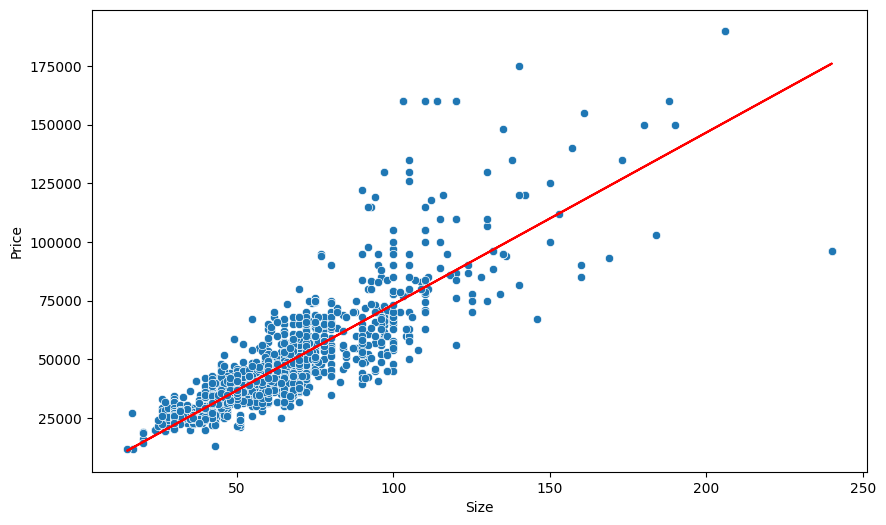

In [20]:
#0 va 01 yordamida chiziq chizamiz
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, numerator1*x_train + denominator0, '-r')

plt.xlabel('Size')
plt.ylabel('Price')

In [21]:
x_test = np.asanyarray(train_set[['size']])
y_test = np.asanyarray(train_set[['price']])

In [22]:
y_predict1 = lr_model.predict(x_train)


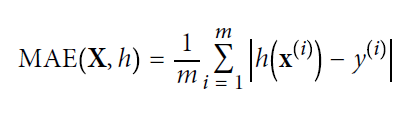

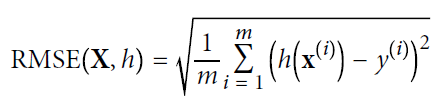

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_predict1)
rmse = np.sqrt(mean_squared_error(y_test, y_predict1))

print(f"{mae=}")
print(f"{rmse=}")

mae=7363.814313938483
rmse=12139.850056167477


#Yangi loyiha


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


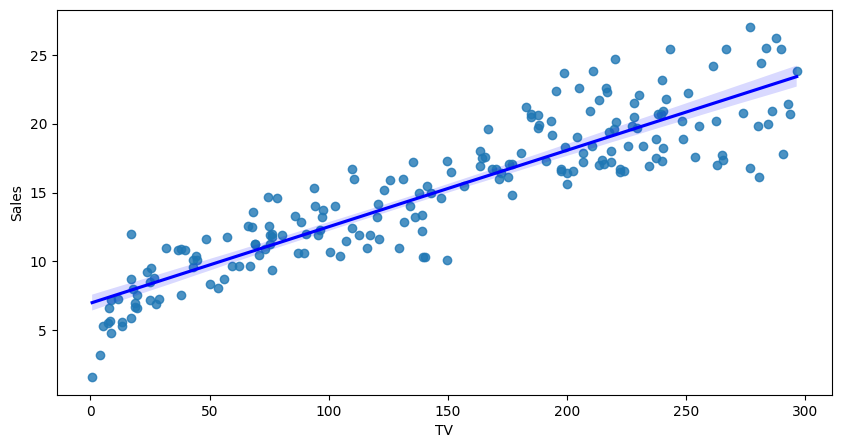

In [26]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "blue"})
plt.show()

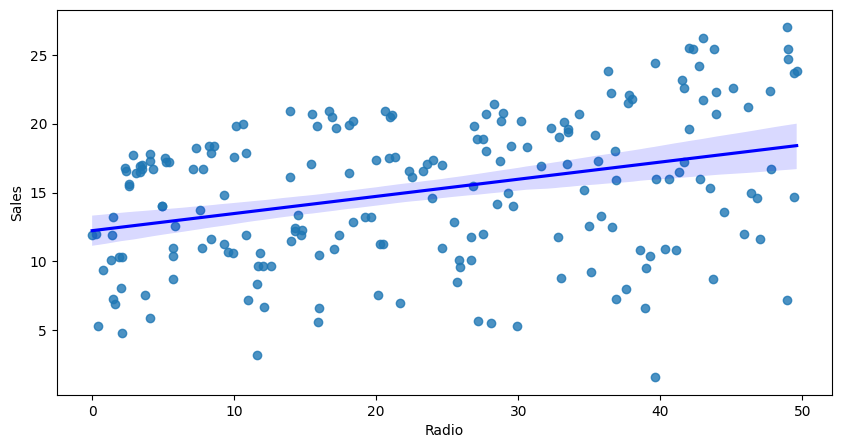

In [27]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Radio', y='Sales', line_kws={"color": "blue"})
plt.show()

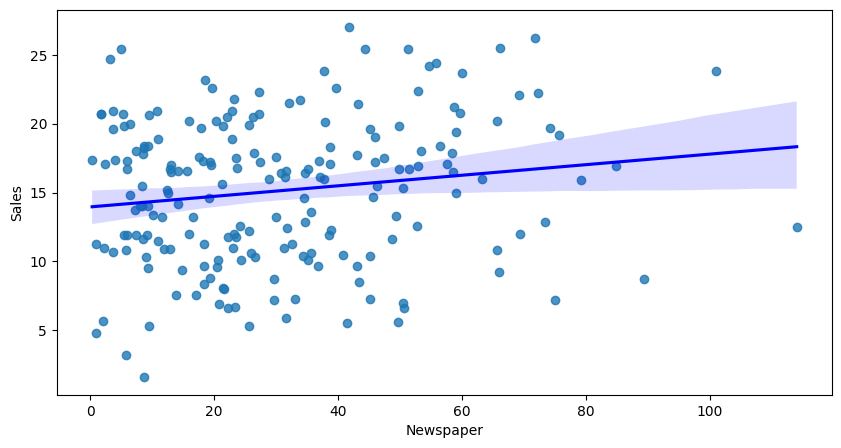

In [28]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Newspaper', y='Sales', line_kws={"color": "blue"})
plt.show()

In [29]:
x_mean = np.mean(x)
y_mean = np.mean(y)
n = len(x)

In [30]:
theta1 = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
print(f"{theta1=}")

theta1=740.0264822713287


In [31]:
theta0 = y_mean - theta1*x_mean
print(f"{theta0=}")

theta0=-195.94911352690542


In [32]:
x_test = df.sample(10, random_state=42)['Newspaper'].to_numpy()
print(f"{x_test=}")
y_test = df.sample(10, random_state=42)['Sales'].to_numpy()
print(f"{y_test=}")


x_test=array([52.9, 52.9, 43.2, 45.2,  3.2, 52.7, 27.2, 18.4, 13.1, 31.5])
y_test=array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 16.5, 16.1])


In [33]:
y_predict = theta0+theta1*x_test
print(f"{y_predict=}")

y_predict=array([38951.45179863, 38951.45179863, 31773.19492059, 33253.24788514,
        2172.13562974, 38803.44650217, 19932.77120425, 13420.53816027,
        9498.39780423, 23114.88507802])


In [34]:
mae = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{mae=}")

mae=24970.29207816641


In [35]:
rmse = np.sqrt(np.sum((y_predict - y_test)**2)/len(y_test))
print(f"{rmse=}")

rmse=28024.906338747296


In [37]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

In [38]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']].to_numpy())

# Modelni tarbiyalaymiz
lr_model.fit(x_train, y_train)

#denominator(01) va  numerator(0) kaifsentlarini
theta1 = lr_model.coef_[0]
theta0 = lr_model.intercept_

print(f"{theta1=}")
print(f"{theta0=}")

theta1=array([0.05513263])
theta0=array([7.04491646])


Text(0, 0.5, 'Sales')

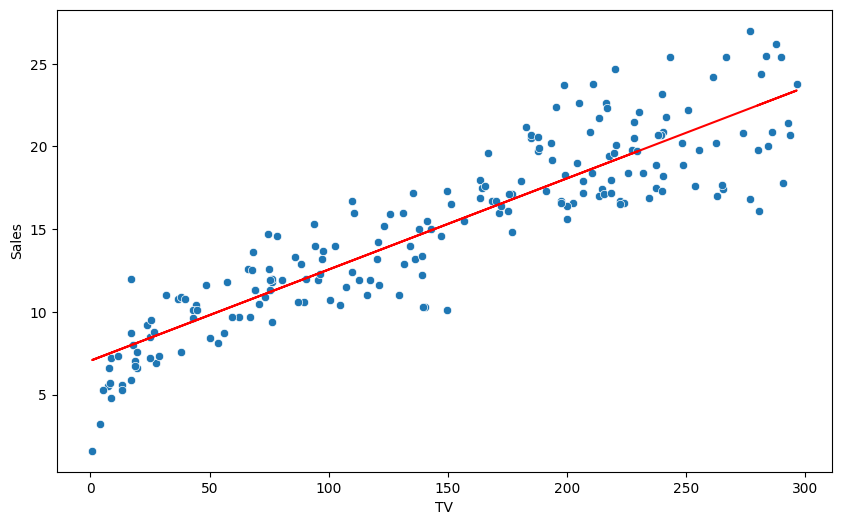

In [41]:
#0 va 01 yordamida chiziq chizamiz
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')

plt.xlabel('TV')
plt.ylabel('Sales')

In [43]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']].to_numpy())

# Modelni tarbiyalaymiz
lr_model.fit(x_train, y_train)

#denominator(01) va  numerator(0) kaifsentlarini
theta1 = lr_model.coef_[0]
theta0 = lr_model.intercept_

print(f"{theta1=}")
print(f"{theta0=}")

theta1=array([0.05513263])
theta0=array([7.04491646])


In [44]:
x_test = np.asanyarray(train_set[['TV']])
y_test = np.asanyarray(train_set[['Sales']])

y_predict1 = lr_model.predict(x_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_predict1)
rmse = np.sqrt(mean_squared_error(y_test, y_predict1))

print(f"{mae=}")
print(f"{rmse=}")

mae=1.8080390821302403
rmse=2.258023448443896
